In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
dataset=pd.read_csv("insurance_pre.csv")

In [3]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [4]:
dataset.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

In [5]:
dataset['smoker']=dataset['smoker'].apply({'yes':1,'no':0}.get)

dataset=pd.get_dummies(dataset,drop_first=True,dtype=int)



In [6]:
dataset.columns


Index(['age', 'bmi', 'children', 'smoker', 'charges', 'sex_male'], dtype='object')

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   smoker    1338 non-null   int64  
 4   charges   1338 non-null   float64
 5   sex_male  1338 non-null   int32  
dtypes: float64(2), int32(1), int64(3)
memory usage: 57.6 KB


In [8]:
dataset

,age,bmi,children,smoker,charges,sex_male
0,19,27.900,0,1,16884.92400,0
1,18,33.770,1,0,1725.55230,1
2,28,33.000,3,0,4449.46200,1
3,33,22.705,0,0,21984.47061,1
4,32,28.880,0,0,3866.85520,1
...,...,...,...,...,...,...
1333,50,30.970,3,0,10600.54830,1
1334,18,31.920,0,0,2205.98080,0
1335,18,36.850,0,0,1629.83350,0
1336,21,25.800,0,0,2007.94500,0


In [9]:
independent=dataset[['age', 'bmi', 'children', 'smoker',  'sex_male']]

In [10]:
independent

,age,bmi,children,smoker,sex_male
0,19,27.900,0,1,0
1,18,33.770,1,0,1
2,28,33.000,3,0,1
3,33,22.705,0,0,1
4,32,28.880,0,0,1
...,...,...,...,...,...
1333,50,30.970,3,0,1
1334,18,31.920,0,0,0
1335,18,36.850,0,0,0
1336,21,25.800,0,0,0


In [11]:
dependent=dataset[['charges']]

In [12]:
dependent

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(independent, dependent, test_size=0.20,random_state=0)

In [37]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [47]:
weight=regressor.coef_
weight

array([[  241.60037166,   424.71710953,   372.20216572, 22963.97034028,
         -345.79558463]])

In [48]:
y_pred=regressor.predict(X_test)

In [49]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)

In [50]:
r_score


0.7945694285037965

In [19]:
dataset

,age,bmi,children,smoker,charges,sex_male
0,19,27.900,0,1,16884.92400,0
1,18,33.770,1,0,1725.55230,1
2,28,33.000,3,0,4449.46200,1
3,33,22.705,0,0,21984.47061,1
4,32,28.880,0,0,3866.85520,1
...,...,...,...,...,...,...
1333,50,30.970,3,0,10600.54830,1
1334,18,31.920,0,0,2205.98080,0
1335,18,36.850,0,0,1629.83350,0
1336,21,25.800,0,0,2007.94500,0


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

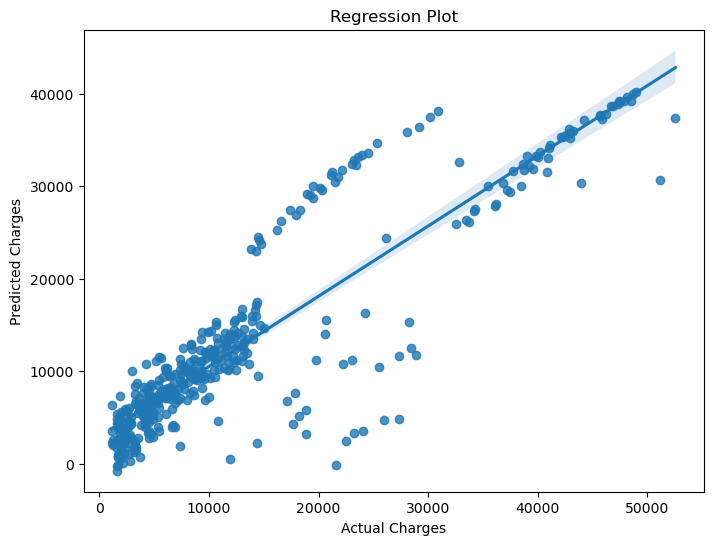

In [21]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test.values.flatten(), y=y_pred.flatten())
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Regression Plot')
plt.show()

In [22]:
import pickle
filename="finalized_model_Mul_linear.sav"
pickle.dump(regressor,open(filename,'wb'))

In [23]:
loaded_model=pickle.load(open("finalized_model_Mul_linear.sav",'rb'))
result=loaded_model.predict([[1234,345,4565,1,0]])

C:\Users\sharanmc\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [24]:
result


array([[2583891.04150178]])